# Building A Handwritten Digits Classifier

#### Darren Ho

## Introduction

Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read address, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detail in [this paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).

In this project, we'll build models that can classify handwritten digits. We'll also:

- Explore why image classification is a hard task
- Observe the limitations of traditional machine learning models for image classification
- Train, test, and improve a few different deep neural networks for image classification
- Explore the effectiveness of deep, feedforward neural networks at classifying images

## Working With Image Data

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of `sklearn.datasets`. The [`load_digits()` function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) returns a copy of the [hand-written digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UC Irvine. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [2]:
digits = load_digits()

# The flattened data matrix
data = pd.DataFrame(digits['data'])
# The classification target
labels = pd.Series(digits['target'])


print('Number of Rows:', data.shape[0])
print('Number of Columns:', data.shape[1])

Number of Rows: 1797
Number of Columns: 64


In [3]:
data.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

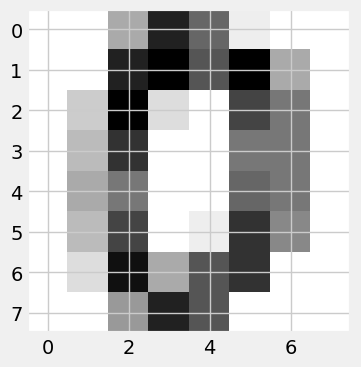

In [4]:
# reshape image
plt.style.use('fivethirtyeight')
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

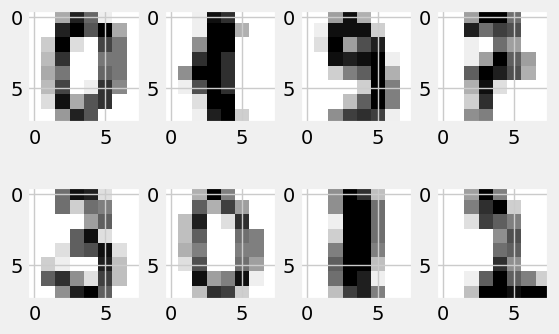

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=4)

axs[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axs[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axs[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axs[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axs[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axs[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axs[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axs[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we needed to reshape the image back to its original dimensions. We transformed the NumPy 2D array into a pandas dataframe, then used matplotlib to visualize some of the images by generating a scatter plot grid and plotting the images corresponded to rows 0, 100, 200, 300 along the first row and rows 1000, 1100, 1200, 1300 along the second row. 

## K-Nearest Neighbors Model

While linear/logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. 

The k-nn algorithm compares every unseen observation in the test set to all training observations to look for similar observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation. 

In [6]:
# set up pipeline for testing/training k-nn models

# function uses KNeighborsClassifier for training k-nearest neighbors models
# k is num of neighbors to use 
def train(k, train_features, train_labels):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, train_labels)
    return knn

# function that tests the model
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    return accuracy_score(test_labels, predictions)

# function that performs 4-fold cross validation using train() and test()
def cross_validate(k):
    
    # empty list
    fold_accuracies = []
    
    # 4-fold cross so n_splits set to 4
    kf = KFold(n_splits = 4, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(data):
        
        # splitting data
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        # use train() and test()
        model = train(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        
        # append overall_accuracy to empty list
        fold_accuracies.append(overall_accuracy)
        
    return fold_accuracies
    

In [7]:
# checking functions

knn_1 = cross_validate(1)
np.mean(knn_1)

0.9827456075228903

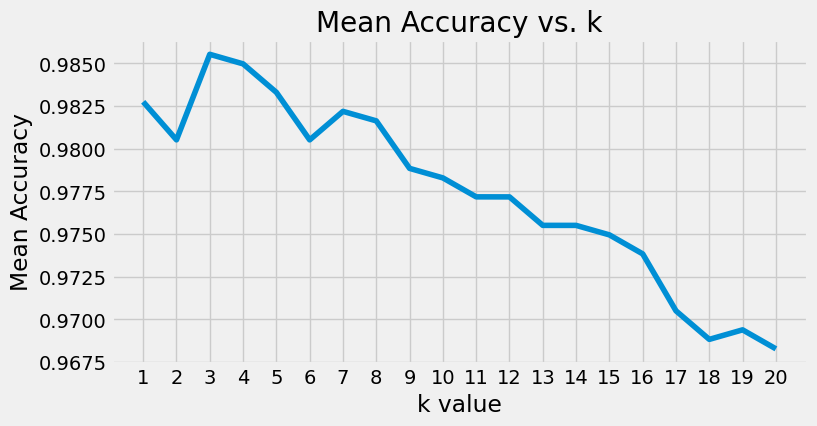

In [8]:
# experimenting with `k` values and plotting mean accuracies
k_values = list(range(1,21))
accs = []

for k in k_values:
    accuracy = cross_validate(k)
    mean_acc = np.mean(accuracy)
    accs.append(mean_acc)


plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs. k')
plt.xlabel('k value')
plt.ylabel('Mean Accuracy')
plt.xticks(range(1,21,1))
plt.plot(k_values, accs)

In [9]:
# `k` values and their respective mean accuracy

for k in k_values[:10]:
    accuracy = cross_validate(k)
    mean_acc = np.mean(accuracy)
    print(k,':',mean_acc)

1 : 0.9827456075228903
2 : 0.9805184360306854
3 : 0.9855283345706509
4 : 0.9849690670626082
5 : 0.9832999257609502
6 : 0.9805159613956941
7 : 0.9821863400148477
8 : 0.9816295471417965
9 : 0.9788468200940361
10 : 0.9782887899034892


We setup a pipeline for testing and training k-nn models where the `train()` function uses `KNeighborsClassifier` for training k-nearest neighbors models, `test()` tests the model and returns accuracy, and `cross_validate()` performs a 4-fold cross validation while incorporating `train` and `test`. 

## Neural Network With One Hidden Layer

There are a few downsides to using k-nearest neighbors:

- High memory usage
- No model representation to debug and explore

So let's now try a neural network with a single hidden layer.

In [10]:
# set up pipeline for testing/training neural network models

# function uses MLPClassifier for training neural network models
def train_nn(neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neurons,max_iter=2000)
    mlp.fit(train_features, train_labels)
    return mlp

# function that tests the model
def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    return accuracy_score(test_labels, predictions)

# function that performs 4-fold cross validation using train() and test()
def cross_validate_nn(neurons):
    
    # empty list
    fold_accuracies = []
    
    # 4-fold cross so n_splits set to 4
    kf = KFold(n_splits = 4, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(data):
        
        # splitting data
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        # use train() and test()
        model = train_nn(neurons, train_features, train_labels)
        overall_accuracy = test_nn(model, test_features, test_labels)
        
        # append overall_accuracy to empty list
        fold_accuracies.append(overall_accuracy)
        
    return fold_accuracies

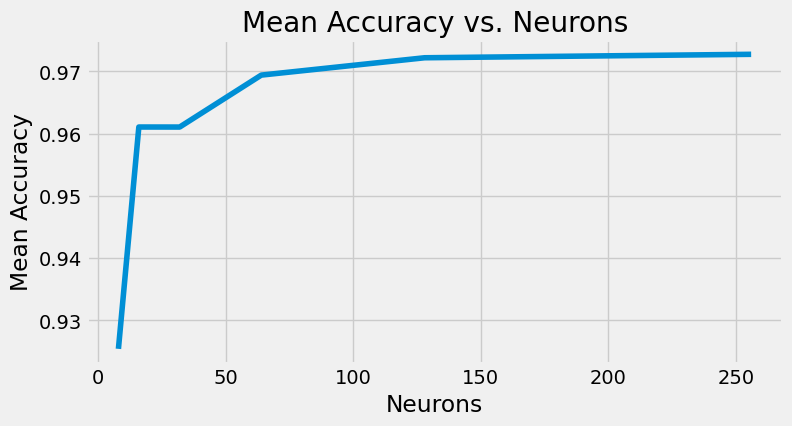

In [11]:
# experimenting with diff neuron values and plotting mean accuracies
neurons_nn = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
accs_nn = []

for n in neurons_nn:
    accuracy = cross_validate_nn(n)
    mean_acc = np.mean(accuracy)
    accs_nn.append(mean_acc)

    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs. Neurons')
plt.xlabel('Neurons')
plt.ylabel('Mean Accuracy')

plt.plot(neurons_nn, accs_nn)

In [12]:
# neurons and their respective mean accuracy

for n in neurons_nn:
    accuracy = cross_validate_nn(n)
    mean_acc = np.mean(accuracy)
    print(n,':',mean_acc)

(8,) : 0.9398997772828507
(16,) : 0.9543664934422171
(32,) : 0.9604875030932937
(64,) : 0.9666109873793616
(128,) : 0.971059143776293
(256,) : 0.9755085374907201


The neural network with one hidden layer improved accuracy to as high as 97.6% with 256 neurons. Comparing the performance of the neural network to the k-nn algorithm, the k-nn models performed better as it reached 98% accuracy. There does not appear to be any advatange to using a single hidden layer for this problem.  

## Neural Network With Two Hidden Layers

Adding more neurons to a single hidden layer vastly improved the classification accuracy.

Let's try using two hidden layers and continue to increase the number of neurons in each layer. 

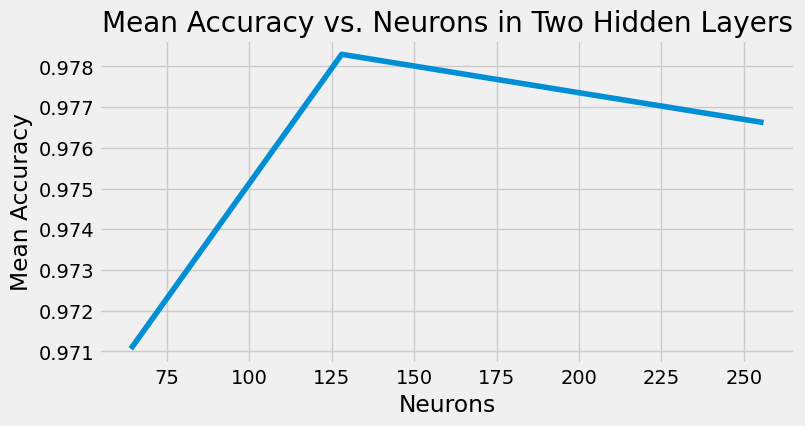

In [13]:
# modifying to use 2 hidden layers instead in the network

neurons_nn2 = [
    (64,64),
    (128, 128),
    (256, 256)
]
accs_nn2 = []

for n in neurons_nn2:
    accuracy = cross_validate_nn(n)
    mean_acc = np.mean(accuracy)
    accs_nn2.append(mean_acc)
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs. Neurons in Two Hidden Layers')
plt.xlabel('Neurons')
plt.ylabel('Mean Accuracy')
x = [i[0] for i in neurons_nn2]
plt.plot(x, accs_nn2)

In [14]:
for i, acc in zip(x, accs_nn2):
    print(i, ':', acc)

64 : 0.9710616184112845
128 : 0.9782962138084633
256 : 0.9766196486018313


Similar to the neural network with one hidden layer, the neural network with two hidden layers performs better as the number of neurons increases. Both neural networks reached approximately 97.7% at 256 neurons.   

## Neural Network With Three Hidden Layers

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

In [15]:
# modify pipeline to use 6 fold cross validation instead
# set up pipeline for testing/training neural network models

# function uses MLPClassifier for training neural network models
def train_nn(neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neurons,max_iter=1000)
    mlp.fit(train_features, train_labels)
    return mlp

# function that tests the model
def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    return accuracy_score(test_labels, predictions)

# function that performs 6-fold cross validation using train() and test()
def cross_validate_6(neurons):
    
    # empty list
    fold_accuracies = []
    
    # 6-fold cross so n_splits set to 6
    kf = KFold(n_splits = 6, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(data):
        
        # splitting data
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        # use train() and test()
        model = train_nn(neurons, train_features, train_labels)
        overall_accuracy = test_nn(model, test_features, test_labels)
        
        # append overall_accuracy to empty list
        fold_accuracies.append(overall_accuracy)
        
    return fold_accuracies

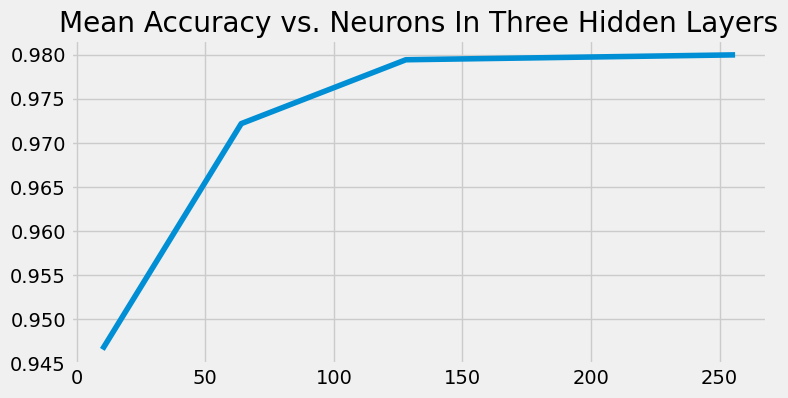

In [16]:
# training nn model using 3 hidden layers

neurons_nn3 = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128),
    (256, 256, 256)
]

acc_nn3 = []

for n in neurons_nn3:
    accuracy = cross_validate_6(n)
    mean_acc = np.mean(accuracy)
    acc_nn3.append(mean_acc)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in neurons_nn3]
plt.plot(x, acc_nn3)

In [17]:
for i, acc in zip(x, acc_nn3):
    print(i, ':', acc)

10 : 0.9465904868078782
64 : 0.9721794871794872
128 : 0.9794184318097363
256 : 0.9799721293199554


Simlar to the neural networks with one and two hidden layers, we see that the accuracy improves as the number of neurons increases. However, we see that the neural network with three hidden layers reaches approximately 98% at 256 neurons, where the other two networks didn't reach as highly.  

## Conclusion

In this project, we experimented with different models to classify handwritten digits. We first experimented with different `k` values using the k-nearest neighbors algorithm. We then built neural network models, starting off with a single hidden layer and then moved onto two and three hidden layer models. 

We found that none of the neural networds performed better than the k-nearest neighbors model we started off with. The k-nn model was able to reach approximately 98.6% at a `k` value of 3. The model that came the closest in terms of performance was the neural network with three hidden layers. That model returned a accuracy of approximately 98%. 

## Next Steps

Here are some next steps to further improve this project:

- Use existing pipeline to try other ML models:
    - Decision Tree Models
    - Random Forest Models
- Write up a summary of the effectiveness of the different models we try, with data to back up conclusions
- Experiment with different activation functions to see if accuracies improve
- Research some techniques for visualizing weights in neural network models and add a visualization step to pipeline